In [1]:
%%capture
! pip install bayesian-optimization==1.1.0

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/graphite/keyword_category_prediction_api

/content/drive/MyDrive/graphite/keyword_category_prediction_api


In [12]:
from bayes_opt import BayesianOptimization
from modeling.baseline_models.hyperparameters.random_forest import evaluate_model
from modeling.baseline_models.hyperparameters.plots.gaussian_process_plot import plot_gp

# For loading progress
from bayes_opt.util import load_logs

import json

# Get category names


In [13]:
with open("config.json") as json_file:
    config = json.load(json_file)

# Load logs

In [16]:
for category_idx in range(len(config['CLASS_NAMES'])):
  print(f"\n\nOptimal hyperparameters for category: {config['CLASS_NAMES'][category_idx]}\n")

  # Bounded region of parameter space
  pbounds = {
    'category': (0, 0 + 0.1),
    'n_estimators': (1, 20),
    'criterion': (0, 1),
    'max_features': (0, 1),
    'bootstrap': (0, 1),
    'warm_start': (0, 1),
    'class_weight': (0, 1),
    'ccp_alpha': (1e-5, 100),
    'vectorizer_selection': (0, 1),
    'strip_accents': (0, 1),
    'lowercase': (0, 1),
    'ngram_range': (0, 1),
    'english': (0, 1),
    'italian': (0, 1),
    'french': (0, 1),
    'spanish': (0, 1),
    'dutch': (0, 1),
    'romanian': (0, 1),
    'danish': (0, 1),
    'norwegian': (0, 1),
    'german': (0, 1),
    'swedish': (0, 1),
    'portuguese': (0, 1),
    'finnish': (0, 1),
    'alphanumeric': (0, 1),
    'punctuation_and_lower_cased': (0, 1),
    'new_lines': (0, 1),
    'non_ascii': (0, 1),
}



  optimizer = BayesianOptimization(
      f=evaluate_model,
      pbounds=pbounds,
      verbose=2,  # verbose=1 prints only when a max is observed
      random_state=1,
  )

  load_logs(optimizer, logs=[f"hyperparameter_optimization/random_forest/logs/logs_{config['CLASS_NAMES'][category_idx].lower().replace(' ', '_')}.json"])

  print(optimizer.max, '\n')



Optimal hyperparameters for category: Health

{'target': -8.693981881419807, 'params': {'alphanumeric': 0.404892274293071, 'bootstrap': 0.7824526595308604, 'category': 0.0, 'ccp_alpha': 30.865263788499643, 'class_weight': 0.1050868587021858, 'criterion': 0.06755809217916045, 'danish': 0.14009792118267778, 'dutch': 0.3701580085437139, 'english': 0.34245416148607905, 'finnish': 0.6051610756036018, 'french': 0.41804556636289103, 'german': 0.668324740402279, 'italian': 0.22756189462708626, 'lowercase': 0.8849038701520398, 'max_features': 0.01186490675980616, 'n_estimators': 1.0768771822836083, 'new_lines': 0.4040238640070006, 'ngram_range': 0.5423834921125068, 'non_ascii': 0.10406414153763144, 'norwegian': 0.19333813673830866, 'portuguese': 0.8201845040171066, 'punctuation_and_lower_cased': 0.9910987617151792, 'romanian': 0.28469000274147854, 'spanish': 0.7637488379601513, 'strip_accents': 0.8787795161054319, 'swedish': 0.9400870179658012, 'vectorizer_selection': 0.054609475509661054, 'w

# Gaussian process

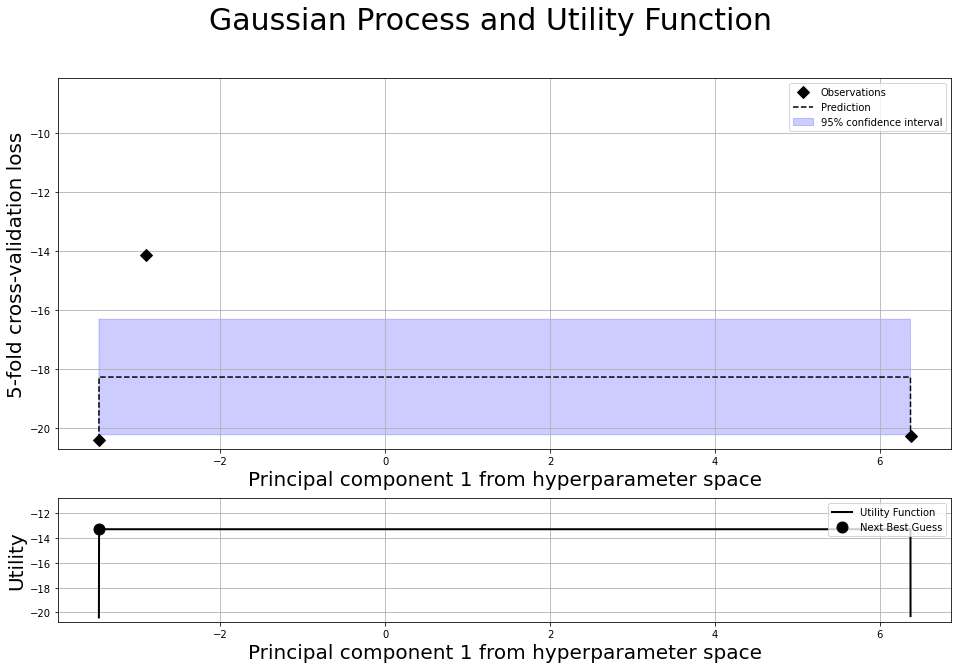

In [17]:
plot_gp(optimizer, axis_color='black', fc_color='b', ec_color='b', alpha=.2)